In [2]:
import spacy
import io
import matplotlib.pyplot as plt

In [3]:
path = "../pg69700.txt"
f = io.open(path, mode="r", encoding="utf-8-sig")
corpus_full = f.read()

In [5]:
print(corpus_full[0:1000])

The Project Gutenberg eBook of The case-book of Sherlock Holmes
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The case-book of Sherlock Holmes

Author: Arthur Conan Doyle

Release date: January 3, 2023 [eBook #69700]
                Most recently updated: November 6, 2023

Language: English

Original publication: United Kingdom: John Murray, 1927

Credits: Al Haines


*** START OF THE PROJECT GUTENBERG EBOOK THE CASE-BOOK OF SHERLOCK HOLMES ***








  THE CASE-BOOK OF
  SHERLOCK HOLMES

  BY ARTHUR CONAN DOYLE



  LONDON
  JOHN MURRAY, ALBEMARLE STREET, W.




_First Published 19

In [12]:
corpus = corpus_full[5048:200000]

In [13]:
# Replace newlines with spaces:
corpus_sentences = corpus.replace("\n", " ")

# Replace backslashes
corpus_sentences = corpus_sentences.replace("\"", "")

In [15]:
for i in range(10):
    corpus_sentences = corpus_sentences.replace("  ", " ")
    i = i + 1

In [16]:
corpus_sentences

"THE ADVENTURE OF THE ILLUSTRIOUS CLIENT It can't hurt now, was Mr. Sherlock Holmes's comment when, for the tenth time in as many years, I asked his leave to reveal the following narrative. So it was that at last I obtained permission to put on record what was, in some ways, the supreme moment of my friend's career. Both Holmes and I had a weakness for the Turkish Bath. It was over a smoke in the pleasant lassitude of the drying-room that I have found him less reticent and more human than anywhere else. On the upper floor of the Northumberland Avenue establishment there is an isolated corner where two couches lie side by side, and it was on these that we lay upon September 3, 1902, the day when my narrative begins. I had asked him whether anything was stirring, and for answer he had shot his long, thin, nervous arm out of the sheets which enveloped him and had drawn an envelope from the inside pocket of the coat which hung beside him. It may be some fussy, self-important fool, it may b

In [17]:
"  " in corpus_sentences

False

In [18]:
sentences = corpus_sentences.split(". ")

In [20]:
sentences[0:20]

["THE ADVENTURE OF THE ILLUSTRIOUS CLIENT It can't hurt now, was Mr",
 "Sherlock Holmes's comment when, for the tenth time in as many years, I asked his leave to reveal the following narrative",
 "So it was that at last I obtained permission to put on record what was, in some ways, the supreme moment of my friend's career",
 'Both Holmes and I had a weakness for the Turkish Bath',
 'It was over a smoke in the pleasant lassitude of the drying-room that I have found him less reticent and more human than anywhere else',
 'On the upper floor of the Northumberland Avenue establishment there is an isolated corner where two couches lie side by side, and it was on these that we lay upon September 3, 1902, the day when my narrative begins',
 'I had asked him whether anything was stirring, and for answer he had shot his long, thin, nervous arm out of the sheets which enveloped him and had drawn an envelope from the inside pocket of the coat which hung beside him',
 'It may be some fussy, self-im

In [21]:
punctuation = (".", ",", ":", ";", "(", ")", "!", "?", "\"")

In [22]:
corpus_words = corpus_sentences

for punct in punctuation:
    corpus_words = corpus_words.replace(punct, "")

# Again replace double spaces with single spaces
for i in range(10):
    corpus_words = corpus_words.replace("  ", " ")
    i = i + 1

In [23]:
corpus_words

"THE ADVENTURE OF THE ILLUSTRIOUS CLIENT It can't hurt now was Mr Sherlock Holmes's comment when for the tenth time in as many years I asked his leave to reveal the following narrative So it was that at last I obtained permission to put on record what was in some ways the supreme moment of my friend's career Both Holmes and I had a weakness for the Turkish Bath It was over a smoke in the pleasant lassitude of the drying-room that I have found him less reticent and more human than anywhere else On the upper floor of the Northumberland Avenue establishment there is an isolated corner where two couches lie side by side and it was on these that we lay upon September 3 1902 the day when my narrative begins I had asked him whether anything was stirring and for answer he had shot his long thin nervous arm out of the sheets which enveloped him and had drawn an envelope from the inside pocket of the coat which hung beside him It may be some fussy self-important fool it may be a matter of life o

In [24]:
corpus_words = corpus_words.lower()


In [25]:
corpus_words

"the adventure of the illustrious client it can't hurt now was mr sherlock holmes's comment when for the tenth time in as many years i asked his leave to reveal the following narrative so it was that at last i obtained permission to put on record what was in some ways the supreme moment of my friend's career both holmes and i had a weakness for the turkish bath it was over a smoke in the pleasant lassitude of the drying-room that i have found him less reticent and more human than anywhere else on the upper floor of the northumberland avenue establishment there is an isolated corner where two couches lie side by side and it was on these that we lay upon september 3 1902 the day when my narrative begins i had asked him whether anything was stirring and for answer he had shot his long thin nervous arm out of the sheets which enveloped him and had drawn an envelope from the inside pocket of the coat which hung beside him it may be some fussy self-important fool it may be a matter of life o

In [28]:
words = corpus_words.split(" ")

In [30]:
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 26.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [34]:
nlp = spacy.load('en_core_web_md')


In [35]:
print("components:", nlp.component_names)


components: ['tok2vec', 'tagger', 'parser', 'senter', 'attribute_ruler', 'lemmatizer', 'ner']


In [36]:
doc = nlp(corpus)


In [37]:
for sentence in doc.sents:
    print(sentence)

THE ADVENTURE OF THE ILLUSTRIOUS CLIENT

"It can't hurt now," was Mr. Sherlock Holmes's comment when, for the
tenth time in as many years, I asked his leave to reveal the following
narrative.  
So it was that at last I obtained permission to put on
record what was, in some ways, the supreme moment of my friend's career.


Both Holmes and I had a weakness for the Turkish Bath.  
It was over a
smoke in the pleasant lassitude of the drying-room that I have found
him less reticent and more human than anywhere else.  
On the upper
floor of the Northumberland Avenue establishment there is an isolated
corner where two couches lie side by side, and it was on these that we
lay upon September 3, 1902, the day when my narrative begins.  
I had
asked him whether anything was stirring, and for answer he had shot his
long, thin, nervous arm out of the sheets which enveloped him and had
drawn an envelope from the inside pocket of the coat which hung beside
him.



"It may be some fussy, self-importan

In [38]:
for token in doc[0:6]:
    print(token.text)

THE
ADVENTURE
OF
THE
ILLUSTRIOUS
CLIENT


In [39]:
from wordcloud import WordCloud
# put this in a separate function
def plot_wordcloud(sw = (""), doc = doc):
      wc = WordCloud(stopwords=sw).generate(str(doc))
      plt.imshow(wc, interpolation='bilinear')
      plt.axis("off")
      return plt.show()

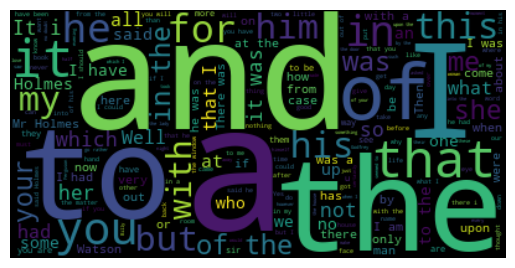

In [40]:
plot_wordcloud(doc = doc)


In [41]:
stopwords = nlp.Defaults.stop_words


In [42]:
print(len(stopwords))
print(stopwords)

326
{'another', 'very', 'over', 'no', 'six', 'something', 'out', 'until', 'move', 'latter', 'he', 'n’t', '’re', 'thereafter', 'indeed', 'everything', 'less', 'per', 'full', "'d", "'re", 'everyone', 'ours', 'while', 'our', 'each', 'is', 'top', 'and', 'becomes', 'forty', 'only', 'still', 'too', 'make', 'seem', 'bottom', 'into', 'otherwise', 'hereafter', 'might', 'onto', 'to', 'would', 'eight', 'except', 'someone', 'elsewhere', 'among', 'formerly', 'own', 'please', 'back', 'latterly', 'i', 'any', 'whither', 'during', 'nor', 'n‘t', 'his', 'more', 'did', 'are', 'nothing', 'fifty', 'anyone', 'sixty', 'under', 'both', 'toward', 'about', 'nobody', 'further', 'after', 'some', 'therein', '’ll', 'namely', 'twenty', 'put', 'themselves', 'an', 'every', 'hereby', 'whence', 'not', 'by', 'through', 'do', 'for', 'alone', 'anyway', 'they', 'side', 'via', 'part', "n't", 'nevertheless', 'may', 'together', 'beforehand', 'hers', 'next', 'really', 'beside', 'whoever', 'me', 'go', 'then', 'third', 'becoming',

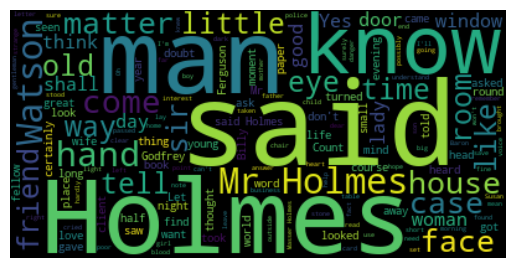

In [43]:
plot_wordcloud(sw= stopwords, doc = doc)


In [44]:
for token in doc:
      print(token.text, token.lemma_)

THE the
ADVENTURE adventure
OF of
THE the
ILLUSTRIOUS ILLUSTRIOUS
CLIENT CLIENT


 


" "
It it
ca can
n't not
hurt hurt
now now
, ,
" "
was be
Mr. Mr.
Sherlock Sherlock
Holmes Holmes
's 's
comment comment
when when
, ,
for for
the the

 

tenth tenth
time time
in in
as as
many many
years year
, ,
I I
asked ask
his his
leave leave
to to
reveal reveal
the the
following follow

 

narrative narrative
. .
   
So so
it it
was be
that that
at at
last last
I I
obtained obtain
permission permission
to to
put put
on on

 

record record
what what
was be
, ,
in in
some some
ways way
, ,
the the
supreme supreme
moment moment
of of
my my
friend friend
's 's
career career
. .


 


Both both
Holmes Holmes
and and
I I
had have
a a
weakness weakness
for for
the the
Turkish Turkish
Bath Bath
. .
   
It it
was be
over over
a a

 

smoke smoke
in in
the the
pleasant pleasant
lassitude lassitude
of of
the the
drying drying
- -
room room
that that
I I
have have
found find

 

him he
less less
reticent re

In [45]:
for token in doc:
    print(token.text, token.pos_)

THE DET
ADVENTURE NOUN
OF ADP
THE DET
ILLUSTRIOUS PROPN
CLIENT PROPN


 SPACE
" PUNCT
It PRON
ca AUX
n't PART
hurt VERB
now ADV
, PUNCT
" PUNCT
was AUX
Mr. PROPN
Sherlock PROPN
Holmes PROPN
's PART
comment NOUN
when SCONJ
, PUNCT
for ADP
the DET

 SPACE
tenth ADJ
time NOUN
in ADP
as ADV
many ADJ
years NOUN
, PUNCT
I PRON
asked VERB
his PRON
leave NOUN
to PART
reveal VERB
the DET
following VERB

 SPACE
narrative NOUN
. PUNCT
  SPACE
So ADV
it PRON
was AUX
that SCONJ
at ADP
last ADV
I PRON
obtained VERB
permission NOUN
to PART
put VERB
on ADP

 SPACE
record NOUN
what PRON
was AUX
, PUNCT
in ADP
some DET
ways NOUN
, PUNCT
the DET
supreme ADJ
moment NOUN
of ADP
my PRON
friend NOUN
's PART
career NOUN
. PUNCT


 SPACE
Both DET
Holmes PROPN
and CCONJ
I PRON
had VERB
a DET
weakness NOUN
for ADP
the DET
Turkish PROPN
Bath PROPN
. PUNCT
  SPACE
It PRON
was AUX
over ADP
a DET

 SPACE
smoke NOUN
in ADP
the DET
pleasant ADJ
lassitude NOUN
of ADP
the DET
drying NOUN
- PUNCT
room NOUN
that PRON
I PR